## Problem Statement 

### House Price Prediction

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
## Read dataset
data=pd.read_csv("E:\\dataset\\dataset\\house-prices-advanced-regression-techniques\\train.csv")
data1=pd.read_csv("E:\\dataset\\dataset\\house-prices-advanced-regression-techniques\\test.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
## Shape of dataset
data.shape

(1460, 81)

In [6]:
## Shape of dataset
data1.shape

(1459, 80)

In [7]:
## Check NaN values
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

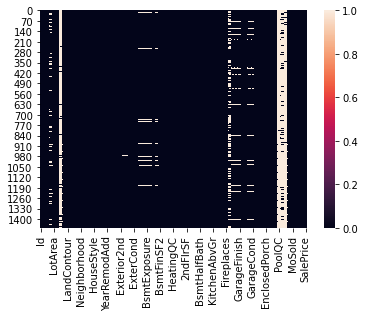

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
df=data.copy()
df1=data1.copy()

In [12]:
df_null=pd.isnull(df).sum()
df1_null=pd.isnull(df1).sum()
null=pd.concat([df_null, df1_null], axis=1, keys=["Train", "Test"])

In [13]:
null

,Train,Test
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
3SsnPorch,0,0.0
Alley,1369,1352.0
BedroomAbvGr,0,0.0
BldgType,0,0.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0


In [14]:
null_many = null[null.sum(axis=1) > 200]  #a lot of missing values
null_few = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  #few missing values
null_many

,Train,Test
Alley,1369,1352.0
Fence,1179,1169.0
FireplaceQu,690,730.0
LotFrontage,259,227.0
MiscFeature,1406,1408.0
PoolQC,1453,1456.0


In [15]:
null_few

,Train,Test
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0
BsmtUnfSF,0,1.0


In [16]:
df.drop(['LotFrontage'],axis=1,inplace=True)

In [17]:
df1.drop(['LotFrontage'],axis=1,inplace=True)

In [18]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

# Features Description

####  MSSubClass: Identifies the type of dwelling involved in the sale.

#### MSZoning: Identifies the general zoning classification of the sale.

#### LotFrontage: Linear feet of street connected to property

#### LotArea: Lot size in square feet

##### Street: Type of road access to property

#### LotShape: General shape of property

#### LandContour: Flatness of the property

#### Utilities: Type of utilities available

#### LotConfig: Lot configuration

#### LandSlope: Slope of property

#### Neighborhood: Physical locations within Ames city limits

#### Condition1: Proximity to various conditions

#### BldgType: Type of dwelling

#### HouseStyle: Style of dwelling

#### OverallQual: Rates the overall material and finish of the house

#### OverallCond: Rates the overall condition of the house

#### YearBuilt: Original construction date

#### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

#### RoofStyle: Type of roof

#### RoofMatl: Roof material

#### Exterior1st: Exterior covering on house

#### ExterQual: Evaluates the quality of the material on the exterior 

#### ExterCond: Evaluates the present condition of the material on the exterior

#### Foundation: Type of foundation

#### BsmtQual: Evaluates the height of the basement

#### BsmtCond: Evaluates the general condition of the basement

#### BsmtExposure: Refers to walkout or garden level walls

#### TotalBsmtSF: Total square feet of basement area

#### CentralAir: Central air conditioning

#### Electrical: Electrical system

#### GrLivArea: Above grade (ground) living area square feet

#### Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

#### Kitchen: Kitchens above grade

#### KitchenQual: Kitchen quality

#### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

#### Functional: Home functionality (Assume typical unless deductions are warranted)

#### GarageType: Garage location

#### GarageYrBlt: Year garage was built

#### GarageFinish: Interior finish of the garage

#### GarageCars: Size of garage in car capacity

#### GarageArea: Size of garage in square feet

#### GarageQual: Garage quality

#### GarageCond: Garage condition

#### WoodDeckSF: Wood deck area in square feet

#### OpenPorchSF: Open porch area in square feet

#### EnclosedPorch: Enclosed porch area in square feet

#### 3SsnPorch: Three season porch area in square feet

#### ScreenPorch: Screen porch area in square feet

#### PoolArea: Pool area in square feet

#### PoolQC: Pool quality

#### MiscFeature: Miscellaneous feature not covered in other categories

In [19]:
columns=['MSSubClass', 'MSZoning', 'LotArea', 'Street',
         'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
         'LandSlope','Neighborhood', 'Condition1',  'BldgType',
         'HouseStyle','OverallQual', 'OverallCond', 'YearBuilt',
         'YearRemodAdd', 'RoofStyle','RoofMatl', 'Exterior1st', 
         'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
         'BsmtExposure', 'TotalBsmtSF', 'CentralAir', 'Electrical', 
         'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
         'Functional','GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars',
         'GarageArea', 'GarageQual', 'GarageCond',
         'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
         'ScreenPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

In [20]:
columns_test=['MSSubClass', 'MSZoning', 'LotArea', 'Street',
              'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
              'LandSlope','Neighborhood', 'Condition1',  'BldgType',
              'HouseStyle','OverallQual', 'OverallCond', 'YearBuilt',
              'YearRemodAdd', 'RoofStyle','RoofMatl', 'Exterior1st', 
              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
              'BsmtExposure', 'TotalBsmtSF', 'CentralAir', 'Electrical', 
              'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
              'Functional','GarageType', 'GarageYrBlt','GarageFinish', 'GarageCars',
              'GarageArea', 'GarageQual', 'GarageCond',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
              'ScreenPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [21]:
train=df[columns]

In [22]:
train.isnull().sum()

MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
TotalBsmtSF       0
CentralAir        0
Electrical        1
GrLivArea         0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
MoSold            0
YrSold            0
SaleType          0


In [23]:
test=df1[columns_test]

In [24]:
test.isnull().sum()

MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
TotalBsmtSF       1
CentralAir        0
Electrical        0
GrLivArea         0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
MoSold            0
YrSold            0
SaleType          1


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non

In [26]:
train.shape

(1460, 52)

In [27]:
test.shape

(1459, 51)

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 51 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1415 non

In [29]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'TotalBsmtSF', 'CentralAir', 'Electrical', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

## Data Pre-Processing

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [32]:
train['BsmtQual'].unique()
### Ex	Excellent (100+ inches)	
### Gd	Good (90-99 inches)
### TA	Typical (80-89 inches)
### Fa	Fair (70-79 inches)
### Po	Poor (<70 inches
### NA	No Basement
### nan-Null values

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [33]:
train['BsmtQual'].isnull().sum()

37

In [34]:
train.BsmtQual=imputer.fit_transform(train['BsmtQual'].values.reshape(-1,1))

In [35]:
train['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [36]:
train['BsmtCond'].isnull().sum()

37

In [37]:
train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [38]:
train['BsmtCond'].unique()
##Ex	Excellent
##Gd	Good
##TA	Typical - slight dampness allowed
##Fa	Fair - dampness or some cracking or settling
##Po	Poor - Severe cracking, settling, or wetness
##NA	No Basement
##nan---Null values

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [39]:
train.BsmtCond=imputer.fit_transform(train['BsmtCond'].values.reshape(-1,1))

In [40]:
train['BsmtExposure'].isnull().sum()

38

In [41]:
train['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [42]:
train['BsmtExposure'].unique()
##Gd	Good Exposure
##Av	Average Exposure (split levels or foyers typically score average or above)	
##Mn	Mimimum Exposure
##No	No Exposure
##NA	No Basement

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [43]:
train.BsmtExposure=imputer.fit_transform(train['BsmtExposure'].values.reshape(-1,1))

In [44]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [45]:
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [46]:
train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [47]:
train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [48]:
train['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [49]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [50]:
train.Electrical=imputer.fit_transform(train['Electrical'].values.reshape(-1,1))
train.GarageQual=imputer.fit_transform(train['GarageQual'].values.reshape(-1,1))
train.GarageCond=imputer.fit_transform(train['GarageCond'].values.reshape(-1,1))
train.GarageType=imputer.fit_transform(train['GarageType'].values.reshape(-1,1))
train.GarageFinish=imputer.fit_transform(train['GarageFinish'].values.reshape(-1,1))

In [51]:
imputer_int=SimpleImputer(missing_values=np.NaN, strategy='median')

In [52]:
train.GarageYrBlt=imputer.fit_transform(train['GarageYrBlt'].values.reshape(-1,1))

In [53]:
test.isnull().sum()

MSSubClass        0
MSZoning          4
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
TotalBsmtSF       1
CentralAir        0
Electrical        0
GrLivArea         0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       1
TotRmsAbvGrd      0
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
MoSold            0
YrSold            0
SaleType          1


In [54]:
test['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [55]:
test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [56]:
test['Exterior1st'].unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'CemntBd',
       'WdShing', 'BrkFace', 'AsbShng', 'BrkComm', 'Stucco', 'AsphShn',
       nan, 'CBlock'], dtype=object)

In [57]:
test['BsmtQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', nan], dtype=object)

In [58]:
test['BsmtCond'].unique()

array(['TA', 'Po', 'Fa', 'Gd', nan], dtype=object)

In [59]:
test['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [60]:
test['TotalBsmtSF'].unique()

array([ 882., 1329.,  928.,  926., 1280.,  763., 1168.,  789., 1300.,
       1405.,  483.,  525.,  855.,  836., 1590., 1544., 1698., 1822.,
       2846., 1671., 1370., 1324., 1145.,  384.,  847., 1629., 1595.,
       1218., 1468.,  831.,  816., 1208., 1231., 1390., 1488.,  840.,
        600.,  756.,  530., 1642.,  975., 1492., 1829., 1224.,  715.,
       1232., 1209., 1510.,  533., 1728., 1140.,  782., 1080., 1604.,
       1480., 1143., 1206., 1244.,  832.,  864.,  972.,  988.,  576.,
       1175., 1395.,  709.,  936., 1347.,  827., 1027., 1008.,  678.,
        930.,  346.,  738., 1108.,  765.,  608.,  572.,  835.,  780.,
        528., 1124.,  888.,  662., 1422.,  689., 1212.,  707.,  856.,
       1832., 1319.,  720., 1420.,  660., 1117.,  663., 1172., 1508.,
       1250., 1433.,  946., 1222.,  676.,  870.,  878., 1026.,  876.,
       1978., 1040.,  848.,    0.,  381., 1196.,  744.,  960., 1107.,
        894., 1528., 1032.,  423.,  982., 1191.,  480.,  629., 1594.,
       1049., 1243.,

In [61]:
test['KitchenQual'].unique()

array(['TA', 'Gd', 'Ex', 'Fa', nan], dtype=object)

In [62]:
test['Functional'].unique()

array(['Typ', 'Min2', 'Min1', 'Mod', 'Maj1', 'Sev', 'Maj2', nan],
      dtype=object)

In [63]:
test['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', nan, 'Basment', '2Types', 'CarPort'],
      dtype=object)

In [64]:
test['GarageYrBlt'].unique()

array([1961., 1958., 1997., 1998., 1992., 1993., 1990., 1970., 1999.,
       1971., 1975., 2009., 2005., 2003., 2002., 2006., 2004., 1920.,
       1974., 2000., 2010., 1967., 1978., 1966., 1964.,   nan, 1994.,
       1949., 1959., 1956., 1952., 1955., 1989., 1950., 1960., 1963.,
       1900., 1957., 1938., 1948., 1962., 1928., 1930., 1926., 1939.,
       1973., 1942., 1979., 1923., 1915., 1917., 1940., 1910., 1969.,
       1968., 1977., 1945., 1987., 1947., 1954., 1941., 1951., 1896.,
       1976., 2008., 2007., 1965., 2001., 1972., 1984., 1985., 1996.,
       1995., 1980., 1986., 1981., 1982., 1991., 1988., 1953., 1924.,
       1927., 1946., 1934., 1983., 1916., 1918., 1937., 1932., 1935.,
       1925., 1921., 1895., 1922., 2207., 1936., 1943., 1919.])

In [65]:
test['GarageFinish'].unique()

array(['Unf', 'Fin', 'RFn', nan], dtype=object)

In [66]:
test['GarageCars'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5., nan])

In [67]:
test['GarageArea'].unique()

array([ 730.,  312.,  482.,  470.,  506.,  440.,  420.,  393.,  525.,
        511.,  264.,  320.,  308.,  751.,  868.,  678.,  958.,  756.,
        484.,  430.,  437.,  400.,  433.,  962.,  880.,  676.,  528.,
        429.,  461.,  762.,  713.,  588.,  480.,  496.,  852.,  592.,
        596.,  535.,  660.,  441.,  490.,  504.,  517.,    0.,  315.,
        576.,  620.,  263.,  318.,  305.,  280.,  240.,  551.,  780.,
        288.,  624.,  363.,  200.,  572.,  180.,  365.,  231.,  450.,
        416.,  591.,  690.,  522.,  467.,  209.,  366., 1017.,  615.,
        580.,  513.,  850.,  621.,  319.,  336.,  352.,  260.,  399.,
        473.,  598.,  531.,  625.,  330.,  741.,  776.,  520.,  686.,
        253.,  286.,  495.,  616.,  275.,  502.,  632.,  390.,  564.,
        396.,  409.,  567.,  529.,  479.,  581.,  565.,  478.,  477.,
        345.,  656.,  754.,  864.,  896.,  834.,  932.,  640.,  927.,
        700.,  583.,  886.,  871.,  949.,  685.,  649.,  539.,  701.,
        392.,  397.,

In [68]:
test['GarageQual'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Po'], dtype=object)

In [69]:
test['GarageCond'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [70]:
test['SaleType'].unique()

array(['WD', 'COD', 'New', 'ConLD', 'Oth', 'Con', 'ConLw', 'ConLI', 'CWD',
       nan], dtype=object)

In [71]:
train.BsmtQual.head()

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object

In [72]:
test.TotalBsmtSF=imputer_int.fit_transform(test['TotalBsmtSF'].values.reshape(-1,1))
test.GarageYrBlt=imputer_int.fit_transform(test['GarageYrBlt'].values.reshape(-1,1))
test.GarageArea=imputer_int.fit_transform(test['GarageArea'].values.reshape(-1,1))
test.MSZoning=imputer.fit_transform(test['MSZoning'].values.reshape(-1,1))
test.Utilities=imputer.fit_transform(test['Utilities'].values.reshape(-1,1))
test.Exterior1st=imputer.fit_transform(test['Exterior1st'].values.reshape(-1,1))
test.BsmtQual=imputer.fit_transform(test['BsmtQual'].values.reshape(-1,1))
test.BsmtCond=imputer.fit_transform(test['BsmtCond'].values.reshape(-1,1))
test.BsmtExposure=imputer.fit_transform(test['BsmtExposure'].values.reshape(-1,1))
test.KitchenQual=imputer.fit_transform(test['KitchenQual'].values.reshape(-1,1))
test.Functional=imputer.fit_transform(test['Functional'].values.reshape(-1,1))
test.GarageType=imputer.fit_transform(test['GarageType'].values.reshape(-1,1))
test.GarageFinish=imputer.fit_transform(test['GarageFinish'].values.reshape(-1,1))
test.GarageCars=imputer.fit_transform(test['GarageCars'].values.reshape(-1,1))
test.GarageQual=imputer.fit_transform(test['GarageQual'].values.reshape(-1,1))
test.GarageCond=imputer.fit_transform(test['GarageCond'].values.reshape(-1,1))
test.SaleType=imputer.fit_transform(test['SaleType'].values.reshape(-1,1))

In [73]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
TotalBsmtSF      0
CentralAir       0
Electrical       0
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [74]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
TotalBsmtSF      0
CentralAir       0
Electrical       0
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non

## Data Visulaization

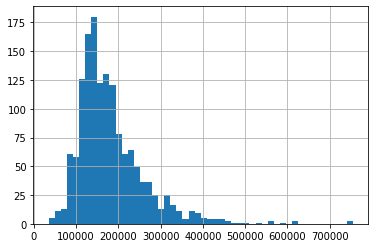

In [76]:
train['SalePrice'].hist(bins=50) ### It is little bit skewed left side it is not normla ditribution

In [77]:
##sns.pairplot(train, size = 2.5)
##plt.show();

Text(0.5, 1.0, 'Year_Built vs Saleprice')

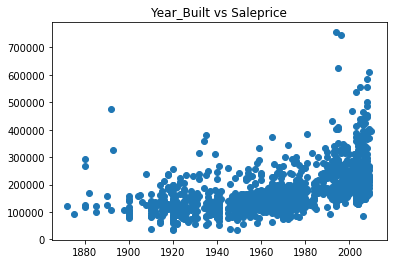

In [78]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train)
plt.title('Year_Built vs Saleprice')

**Note** : The above graph represents the price of house based on the yearbuilt. The most Houses built year between (1910 to 2000)

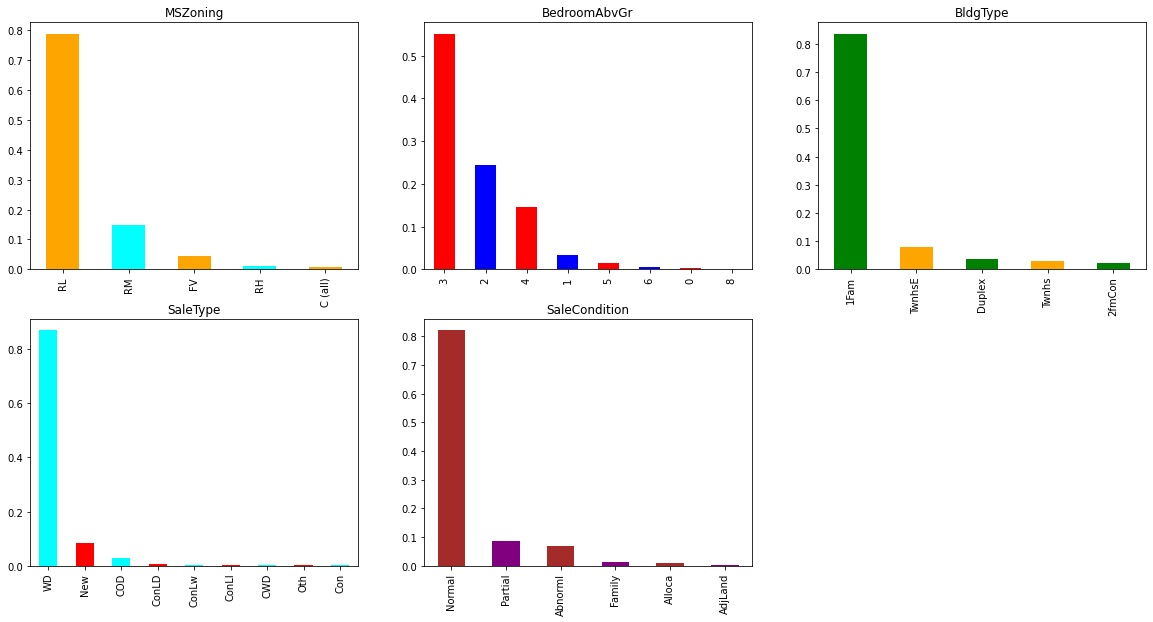

In [79]:
## Visualize the categorial variables
plt.subplot(231)
train['MSZoning'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='MSZoning', color=['orange','cyan'])

plt.subplot(232)
train['BedroomAbvGr'].value_counts(normalize=True).plot.bar(title='BedroomAbvGr', color=['red','blue'])

plt.subplot(233)
train['BldgType'].value_counts(normalize=True).plot.bar(title='BldgType', color=['green','orange'])

plt.subplot(234)
train['SaleType'].value_counts(normalize=True).plot.bar(title='SaleType', color=['cyan','red'])

plt.subplot(235)
train['SaleCondition'].value_counts(normalize=True).plot.bar(title='SaleCondition', color=['brown','purple'])

plt.show()

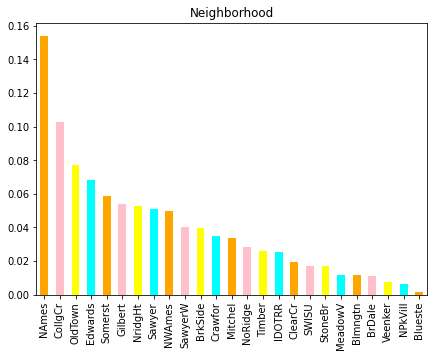

In [80]:
## Visualize the ordinal variables
train['Neighborhood'].value_counts(normalize=True).plot.bar(figsize=(7,5), title='Neighborhood',color=['orange','pink','yellow','cyan'])

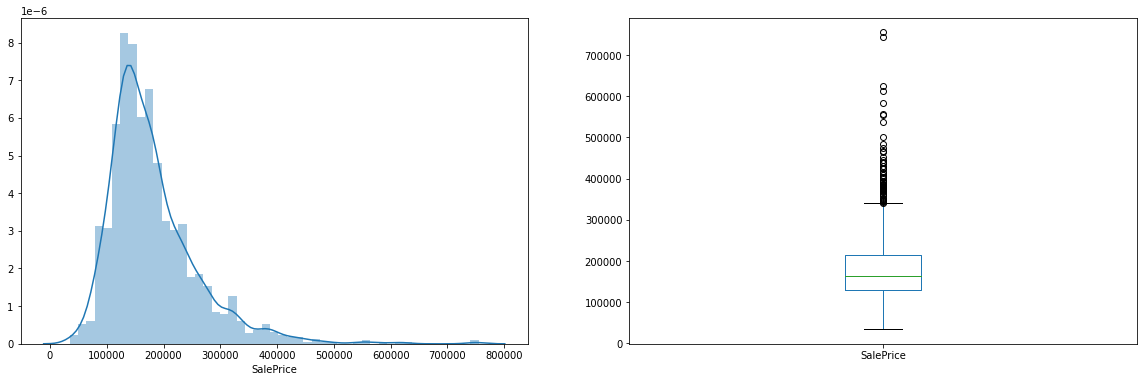

In [81]:
## Visualize Numerical variable
plt.subplot(121)
sns.distplot(train['SalePrice']);

plt.subplot(122)
train['SalePrice'].plot.box(figsize=(20,6))

plt.show()

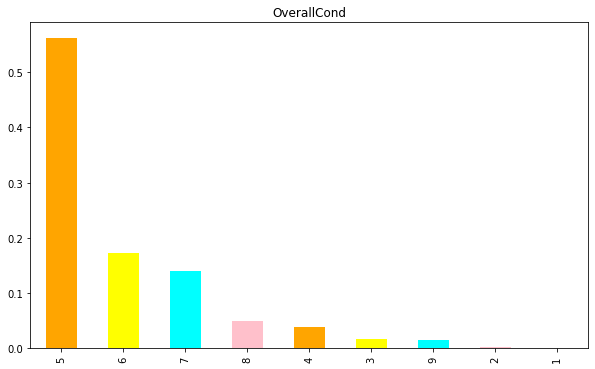

In [82]:
## Visualize the dataset
train['OverallCond'].value_counts(normalize=True).plot.bar(figsize=(10,6), title = 'OverallCond', color=['orange','yellow','cyan','pink'])

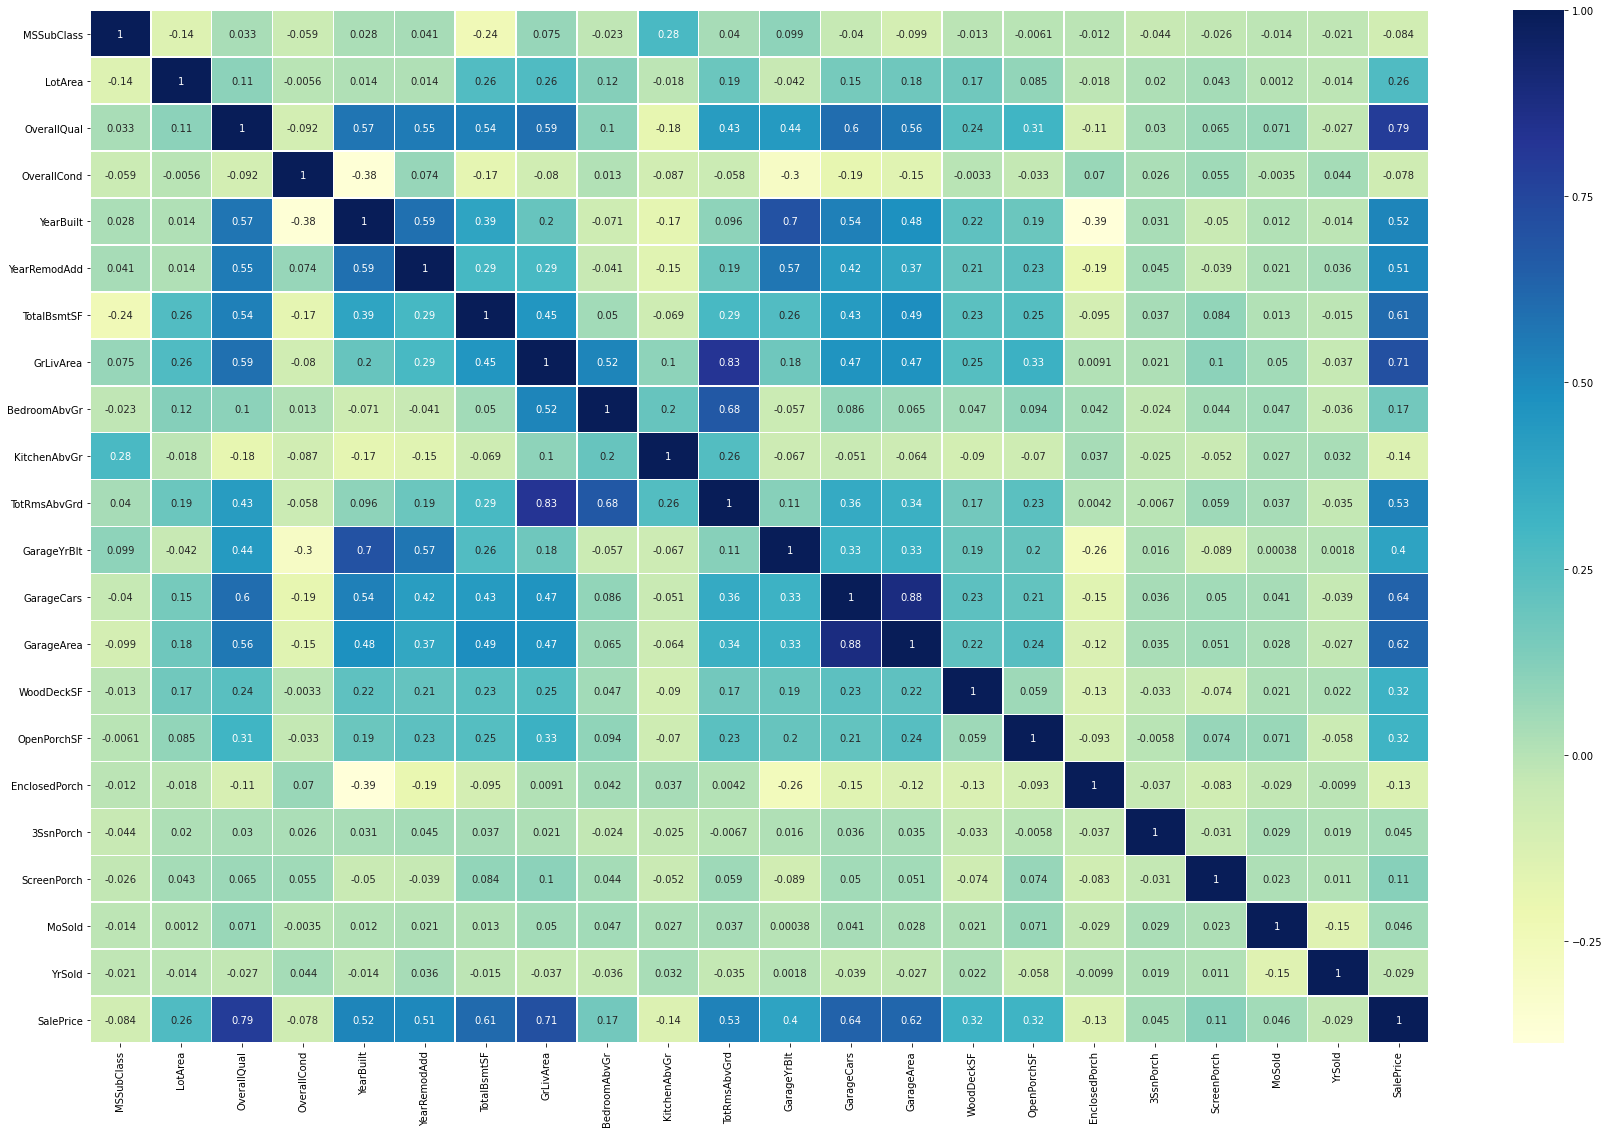

In [83]:
## Correlation of the dataset
plt.subplots(figsize=(30, 19))
sns.heatmap(train.corr(),annot=True, cmap='YlGnBu',linewidth=.5)
plt.show();

In [84]:
train.columns[10:52]

Index(['Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'TotalBsmtSF', 'CentralAir', 'Electrical', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

Text(0.5, 1.0, 'YearBldgTypeBuilt vs OverallQual')

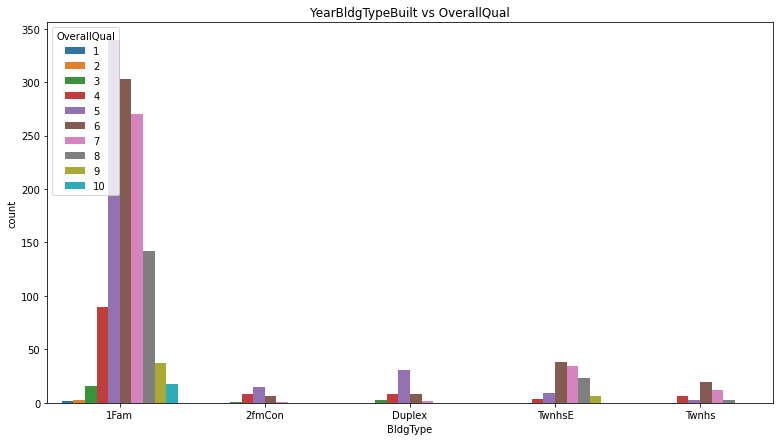

In [85]:
##seaborn countplot
plt.subplots(figsize=(13, 7))
sns.countplot(x='BldgType',hue='OverallQual',data=train)
plt.title("YearBldgTypeBuilt vs OverallQual")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3084EAC50>]],
      dtype=object)

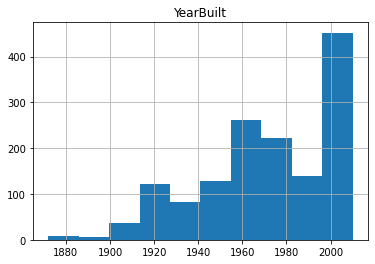

In [86]:
train.hist(column=['YearBuilt'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A308605358>]],
      dtype=object)

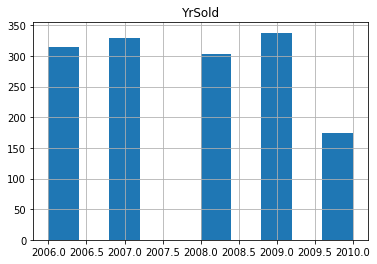

In [87]:
train.hist(column=['YrSold'])

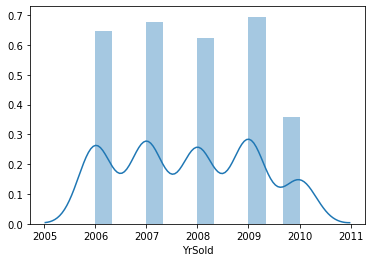

In [88]:
## Visualize Numerical variable
sns.distplot(train['YrSold']);

In [89]:
## Change to normal distribution
train['SalePrice_log']=np.log(train['SalePrice'])

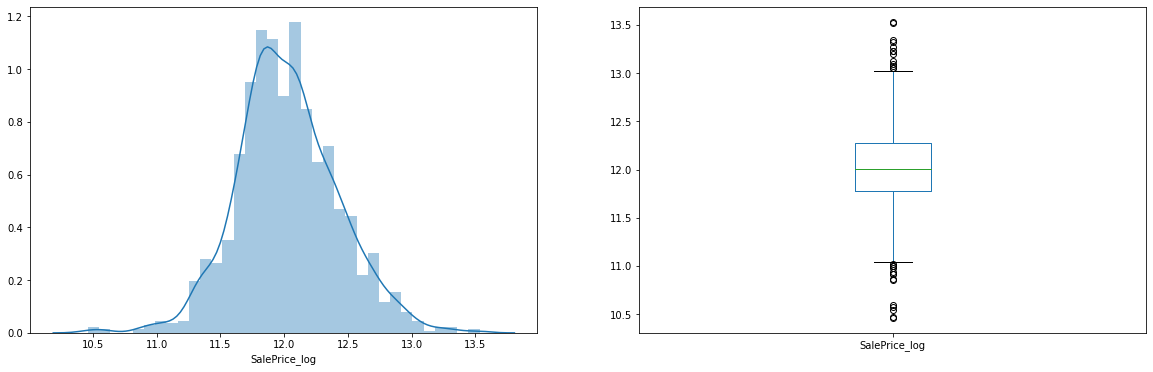

In [90]:
## Visualize Numerical variable
plt.subplot(121)
sns.distplot(train['SalePrice_log']);

plt.subplot(122)
train['SalePrice_log'].plot.box(figsize=(20,6))

plt.show()

##  Missing values Imputation

In [91]:
from sklearn.impute import SimpleImputer

In [92]:
imputer=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

In [93]:
train['BsmtQual'].unique()
### Ex	Excellent (100+ inches)	
### Gd	Good (90-99 inches)
### TA	Typical (80-89 inches)
### Fa	Fair (70-79 inches)
### Po	Poor (<70 inches
### NA	No Basement
### nan-Null values

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [94]:
train['BsmtQual'].isnull().sum()

0

In [95]:
test.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
TotalBsmtSF      0
CentralAir       0
Electrical       0
GrLivArea        0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [96]:
train['MSZoning'].value_counts().to_dict()

{'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10}

In [97]:
mszoning={'RL': 1, 'RM': 2, 'FV': 3, 'RH': 4, 'C (all)': 5}

In [98]:
train['MSZoning']=train['MSZoning'].map(mszoning)

In [99]:
train['MSZoning'].tail(5)

1455    1
1456    1
1457    1
1458    1
1459    1
Name: MSZoning, dtype: int64

In [100]:
train['Street'].value_counts().to_dict()

{'Pave': 1454, 'Grvl': 6}

In [101]:
street={'Pave': 1, 'Grvl': 0}

In [102]:
train['Street']=train['Street'].map(street)

In [103]:
train['MSZoning'].unique()

array([1, 2, 5, 3, 4], dtype=int64)

In [104]:
train['LotShape'].value_counts().to_dict()

{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}

In [105]:
lotshape={'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}

In [106]:
train['LotShape']=train['LotShape'].map(lotshape)

In [107]:
train['LotShape'].unique()

array([1, 2, 3, 4], dtype=int64)

In [108]:
train['LandContour'].value_counts().to_dict()

{'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}

In [109]:
land={'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4}

In [110]:
train['LandContour']=train['LandContour'].map(land)

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1460 non-nul

In [112]:
train['Utilities'].value_counts().to_dict()

{'AllPub': 1459, 'NoSeWa': 1}

In [113]:
uti={'AllPub': 1, 'NoSeWa': 0}

In [114]:
train['Utilities']=train['Utilities'].map(uti)

In [115]:
train['Utilities'].unique()

array([1, 0], dtype=int64)

In [116]:
train['LotConfig'].value_counts().to_dict()

{'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4}

In [117]:
lotcon={'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4}

In [118]:
train['LotConfig']=train['LotConfig'].map(lotcon)

In [119]:
train['LotConfig'].unique()

array([0, 3, 1, 2, 4], dtype=int64)

In [120]:
train['LandSlope'].value_counts().to_dict()

{'Gtl': 1382, 'Mod': 65, 'Sev': 13}

In [121]:
land={'Gtl': 0, 'Mod': 1, 'Sev': 2}

In [122]:
train['LandSlope']=train['LandSlope'].map(land)

In [123]:
train['LandSlope'].unique()

array([0, 1, 2], dtype=int64)

In [124]:
train['Neighborhood'].value_counts().to_dict()

{'NAmes': 225,
 'CollgCr': 150,
 'OldTown': 113,
 'Edwards': 100,
 'Somerst': 86,
 'Gilbert': 79,
 'NridgHt': 77,
 'Sawyer': 74,
 'NWAmes': 73,
 'SawyerW': 59,
 'BrkSide': 58,
 'Crawfor': 51,
 'Mitchel': 49,
 'NoRidge': 41,
 'Timber': 38,
 'IDOTRR': 37,
 'ClearCr': 28,
 'SWISU': 25,
 'StoneBr': 25,
 'MeadowV': 17,
 'Blmngtn': 17,
 'BrDale': 16,
 'Veenker': 11,
 'NPkVill': 9,
 'Blueste': 2}

In [125]:
neigh={'NAmes': 0,
 'CollgCr': 1,
 'OldTown': 2,
 'Edwards': 3,
 'Somerst': 4,
 'Gilbert': 5,
 'NridgHt': 6,
 'Sawyer': 7,
 'NWAmes': 8,
 'SawyerW': 9,
 'BrkSide': 10,
 'Crawfor': 11,
 'Mitchel': 12,
 'NoRidge': 13,
 'Timber': 14,
 'IDOTRR': 15,
 'ClearCr': 16,
 'StoneBr': 17,
 'SWISU': 18,
 'MeadowV': 19,
 'Blmngtn': 20,
 'BrDale': 21,
 'Veenker': 22,
 'NPkVill': 23,
 'Blueste': 24}

In [126]:
train['Neighborhood']=train['Neighborhood'].map(neigh)

In [127]:
train['Neighborhood'].unique()

array([ 1, 22, 11, 13, 12,  4,  8,  2, 10,  7,  6,  0,  9, 15, 19,  3, 14,
        5, 17, 16, 23, 20, 21, 18, 24], dtype=int64)

In [128]:
train['Condition1'].value_counts().to_dict()

{'Norm': 1260,
 'Feedr': 81,
 'Artery': 48,
 'RRAn': 26,
 'PosN': 19,
 'RRAe': 11,
 'PosA': 8,
 'RRNn': 5,
 'RRNe': 2}

In [129]:
condit={'Norm': 0,
 'Feedr': 1,
 'Artery': 2,
 'RRAn': 3,
 'PosN': 4,
 'RRAe': 5,
 'PosA': 6,
 'RRNn': 7,
 'RRNe': 8}

In [130]:
train['Condition1']=train['Condition1'].map(condit)

In [131]:
train['Condition1'].unique()

array([0, 1, 4, 2, 5, 7, 3, 6, 8], dtype=int64)

In [132]:
train['BldgType'].value_counts().to_dict()

{'1Fam': 1220, 'TwnhsE': 114, 'Duplex': 52, 'Twnhs': 43, '2fmCon': 31}

In [133]:
buld={'1Fam': 0, 'TwnhsE': 1, 'Duplex': 2, 'Twnhs': 3, '2fmCon': 4}

In [134]:
train['BldgType']=train['BldgType'].map(buld)

In [135]:
train['BldgType'].unique()

array([0, 4, 2, 1, 3], dtype=int64)

In [136]:
train['HouseStyle'].value_counts().to_dict()

{'1Story': 726,
 '2Story': 445,
 '1.5Fin': 154,
 'SLvl': 65,
 'SFoyer': 37,
 '1.5Unf': 14,
 '2.5Unf': 11,
 '2.5Fin': 8}

In [137]:
house={'1Story': 0,
 '2Story': 1,
 '1.5Fin': 2,
 'SLvl': 3,
 'SFoyer': 4,
 '1.5Unf': 5,
 '2.5Unf': 6,
 '2.5Fin': 7}

In [138]:
train['HouseStyle']=train['HouseStyle'].map(house)

In [139]:
train['HouseStyle'].unique()

array([1, 0, 2, 5, 4, 3, 6, 7], dtype=int64)

In [140]:
train['RoofStyle'].value_counts().to_dict()

{'Gable': 1141, 'Hip': 286, 'Flat': 13, 'Gambrel': 11, 'Mansard': 7, 'Shed': 2}

In [141]:
roof={'Gable': 0, 'Hip': 1, 'Flat': 2, 'Gambrel': 3, 'Mansard': 4, 'Shed': 5}

In [142]:
train['RoofStyle']=train['RoofStyle'].map(roof)

In [143]:
train['RoofStyle'].unique()

array([0, 1, 3, 4, 2, 5], dtype=int64)

In [144]:
train['RoofMatl'].value_counts().to_dict()

{'CompShg': 1434,
 'Tar&Grv': 11,
 'WdShngl': 6,
 'WdShake': 5,
 'Metal': 1,
 'ClyTile': 1,
 'Membran': 1,
 'Roll': 1}

In [145]:
roofmt={'CompShg': 0,
 'Tar&Grv': 1,
 'WdShngl': 2,
 'WdShake': 3,
 'ClyTile': 4,
 'Membran': 5,
 'Roll': 6,
 'Metal': 7}

In [146]:
train['RoofMatl']=train['RoofMatl'].map(roofmt)

In [147]:
train['RoofMatl'].unique()

array([0, 2, 7, 3, 5, 1, 6, 4], dtype=int64)

In [148]:
train['Exterior1st'].value_counts().to_dict()

{'VinylSd': 515,
 'HdBoard': 222,
 'MetalSd': 220,
 'Wd Sdng': 206,
 'Plywood': 108,
 'CemntBd': 61,
 'BrkFace': 50,
 'WdShing': 26,
 'Stucco': 25,
 'AsbShng': 20,
 'Stone': 2,
 'BrkComm': 2,
 'ImStucc': 1,
 'CBlock': 1,
 'AsphShn': 1}

In [149]:
exterior={'VinylSd': 0,
 'HdBoard': 1,
 'MetalSd': 2,
 'Wd Sdng': 3,
 'Plywood': 4,
 'CemntBd': 5,
 'BrkFace': 6,
 'WdShing': 7,
 'Stucco': 8,
 'AsbShng': 9,
 'Stone': 10,
 'BrkComm': 11,
 'AsphShn': 12,
 'ImStucc': 13,
 'CBlock': 14}

In [150]:
train['Exterior1st']=train['Exterior1st'].map(exterior)

In [151]:
train['Exterior1st'].unique()

array([ 0,  2,  3,  1,  6,  7,  5,  4,  9,  8, 11, 12, 10, 13, 14],
      dtype=int64)

In [152]:
train['ExterQual'].value_counts().to_dict()

{'TA': 906, 'Gd': 488, 'Ex': 52, 'Fa': 14}

In [153]:
ExterQual={'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3}

In [154]:
train['ExterQual']=train['ExterQual'].map(ExterQual)

In [155]:
train['ExterQual'].unique()

array([1, 0, 2, 3], dtype=int64)

In [156]:
train['ExterCond'].value_counts().to_dict()

{'TA': 1282, 'Gd': 146, 'Fa': 28, 'Ex': 3, 'Po': 1}

In [157]:
ExterCond={'TA': 0, 'Gd': 1, 'Fa': 2, 'Ex': 3, 'Po': 4}

In [158]:
train['ExterCond']=train['ExterCond'].map(ExterCond)

In [159]:
train['ExterCond'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [160]:
train['Foundation'].value_counts().to_dict()

{'PConc': 647, 'CBlock': 634, 'BrkTil': 146, 'Slab': 24, 'Stone': 6, 'Wood': 3}

In [161]:
Foundation={'PConc': 0, 'CBlock': 1, 'BrkTil': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5}

In [162]:
train['Foundation']=train['Foundation'].map(Foundation)

In [163]:
train['Foundation'].unique()

array([0, 1, 2, 5, 3, 4], dtype=int64)

In [164]:
train['BsmtQual'].value_counts().to_dict()

{'TA': 686, 'Gd': 618, 'Ex': 121, 'Fa': 35}

In [165]:
BsmtQual={'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3}

In [166]:
train['BsmtQual']=train['BsmtQual'].map(BsmtQual)

In [167]:
train['BsmtQual'].unique()

array([1, 0, 2, 3], dtype=int64)

In [168]:
train['BsmtCond'].value_counts().to_dict()

{'TA': 1348, 'Gd': 65, 'Fa': 45, 'Po': 2}

In [169]:
BsmtCond={'TA': 0, 'Gd': 1, 'Fa': 2, 'Po': 3}

In [170]:
train['BsmtCond']=train['BsmtCond'].map(BsmtCond)

In [171]:
train['BsmtCond'].unique()

array([0, 1, 2, 3], dtype=int64)

In [172]:
train['BsmtExposure'].value_counts().to_dict()

{'No': 991, 'Av': 221, 'Gd': 134, 'Mn': 114}

In [173]:
BsmtExposure={'No': 0, 'Av': 1, 'Gd': 2, 'Mn': 3}

In [174]:
train['BsmtExposure']=train['BsmtExposure'].map(BsmtExposure)

In [175]:
train['BsmtExposure'].unique()

array([0, 2, 3, 1], dtype=int64)

In [176]:
train['CentralAir'].value_counts().to_dict()

{'Y': 1365, 'N': 95}

In [177]:
CentralAir={'Y': 1, 'N': 0}

In [178]:
train['CentralAir']=train['CentralAir'].map(CentralAir)

In [179]:
train['CentralAir'].unique()

array([1, 0], dtype=int64)

In [180]:
train['Electrical'].value_counts().to_dict()

{'SBrkr': 1335, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1}

In [181]:
Electrical={'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4}

In [182]:
train['Electrical']=train['Electrical'].map(Electrical)

In [183]:
train['Electrical'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [184]:
train['KitchenQual'].value_counts().to_dict()

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [185]:
KitchenQual={'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3}

In [186]:
train['KitchenQual']=train['KitchenQual'].map(KitchenQual)

In [187]:
train['KitchenQual'].unique()

array([1, 0, 2, 3], dtype=int64)

In [188]:
train['Functional'].value_counts().to_dict()

{'Typ': 1360,
 'Min2': 34,
 'Min1': 31,
 'Mod': 15,
 'Maj1': 14,
 'Maj2': 5,
 'Sev': 1}

In [189]:
Functional={'Typ': 0,
 'Min2': 1,
 'Min1': 2,
 'Mod': 3,
 'Maj1': 4,
 'Maj2': 5,
 'Sev': 6}

In [190]:
train['Functional']=train['Functional'].map(Functional)

In [191]:
train['Functional'].unique()

array([0, 2, 4, 1, 3, 5, 6], dtype=int64)

In [192]:
train['GarageType'].value_counts().to_dict()

{'Attchd': 951,
 'Detchd': 387,
 'BuiltIn': 88,
 'Basment': 19,
 'CarPort': 9,
 '2Types': 6}

In [193]:
GarageType={'Attchd': 0,
 'Detchd': 1,
 'BuiltIn': 2,
 'Basment': 3,
 'CarPort': 4,
 '2Types': 5}

In [194]:
train['GarageType']=train['GarageType'].map(GarageType)

In [195]:
train['GarageType'].unique()

array([0, 1, 2, 4, 3, 5], dtype=int64)

In [196]:
train['GarageFinish'].value_counts().to_dict()

{'Unf': 686, 'RFn': 422, 'Fin': 352}

In [197]:
GarageFinish={'Unf': 0, 'RFn': 1, 'Fin': 2}

In [198]:
train['GarageFinish']=train['GarageFinish'].map(GarageFinish)

In [199]:
train['GarageFinish'].unique()

array([1, 0, 2], dtype=int64)

In [200]:
train['GarageQual'].value_counts().to_dict()

{'TA': 1392, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po': 3}

In [201]:
GarageQual={'TA': 0, 'Fa': 1, 'Gd': 2, 'Ex': 3, 'Po': 4}

In [202]:
train['GarageQual']=train['GarageQual'].map(GarageQual)

In [203]:
train['GarageQual'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [204]:
train['GarageCond'].value_counts().to_dict()

{'TA': 1407, 'Fa': 35, 'Gd': 9, 'Po': 7, 'Ex': 2}

In [205]:
GarageCond={'TA': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'Ex': 4}

In [206]:
train['GarageCond']=train['GarageCond'].map(GarageCond)

In [207]:
train['GarageCond'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [208]:
train['SaleType'].value_counts().to_dict()

{'WD': 1267,
 'New': 122,
 'COD': 43,
 'ConLD': 9,
 'ConLw': 5,
 'ConLI': 5,
 'CWD': 4,
 'Oth': 3,
 'Con': 2}

In [209]:
SaleType={'WD': 0,
 'New': 1,
 'COD': 2,
 'ConLD': 3,
 'ConLI': 4,
 'ConLw': 5,
 'CWD': 6,
 'Oth': 7,
 'Con': 8}

In [210]:
train['SaleType']=train['SaleType'].map(SaleType)

In [211]:
train['SaleType'].unique()

array([0, 1, 2, 3, 4, 6, 5, 8, 7], dtype=int64)

In [212]:
train['SaleCondition'].value_counts().to_dict()

{'Normal': 1198,
 'Partial': 125,
 'Abnorml': 101,
 'Family': 20,
 'Alloca': 12,
 'AdjLand': 4}

In [213]:
SaleCondition = {'Normal': 0,
 'Partial': 1,
 'Abnorml': 2,
 'Family': 3,
 'Alloca': 4,
 'AdjLand': 5}

In [214]:
train['SaleCondition']=train['SaleCondition'].map(SaleCondition)

In [215]:
train['SaleCondition'].unique()

array([0, 2, 1, 5, 4, 3], dtype=int64)

In [216]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 53 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
ExterQual        1460 non-null int64
ExterCond        1460 non-null int64
Foundation       1460 non-null int64
BsmtQual         1460 non-null int64
BsmtC

In [217]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
0,60,1,8450,1,1,1,1,0,0,1,...,61,0,0,0,2,2008,0,0,208500,12.247694
1,20,1,9600,1,1,1,1,3,0,22,...,0,0,0,0,5,2007,0,0,181500,12.109011
2,60,1,11250,1,2,1,1,0,0,1,...,42,0,0,0,9,2008,0,0,223500,12.317167
3,70,1,9550,1,2,1,1,1,0,11,...,35,272,0,0,2,2006,0,2,140000,11.849398
4,60,1,14260,1,2,1,1,3,0,13,...,84,0,0,0,12,2008,0,0,250000,12.429216


## Model Evaluation
Now that we've explored the data, we can begin to build and test different models for regression to predict the SalePrice of each house. In classification, we used accuracy as a evaluation metric. In regression, we will use the R^2 score as well as the RMSE to evaluate our model performance. We will also use cross validation to optimize our model hyperparameters.

In [218]:
#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [219]:
X_train = train.drop(["SalePrice","SalePrice_log"], axis=1)
y_train = train["SalePrice_log"]

In [220]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0) #X_valid and y_valid are the validation sets

## Linear Regression

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x)

In [221]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_training,y_training)
print(lm)

LinearRegression()


**Model Evaluation**
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

## Intercept


The intercept (often labeled the constant) is the expected mean value of Y when all X=0. Start with a regression equation with one predictor, X. If X sometimes equals 0, the intercept is simply the expected mean value of Y at that value. ... It's the mean value of Y at the chosen value of X.

In [222]:
# print the intercept
print(lm.intercept_)

12.741679175007746


In [223]:
predictions = lm.predict(X_valid)
predictions= predictions.reshape(-1,1)

In [224]:
submission_predictions = np.exp(predictions)

In [225]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, submission_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, submission_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, submission_predictions)))

MAE: 183773.3783452462
MSE: 47025552109.2115
RMSE: 216853.75742470202


## GridSearchCV

GridSearchCV is a function that comes in Scikit-learn's(or SK-learn) model_selection package.So an important point here to note is that we need to have Scikit-learn library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.

In [226]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best LinReg Model: LinearRegression()
Best Score: 0.8660549297083797


In [227]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.8077016963675668
RMSE Score: 0.1723723560518003


## Cross-validation

Cross-validation is a statistical method used to estimate the skill of machine learning models. ... That k-fold cross validation is a procedure used to estimate the skill of the model on new data.

In [228]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.8714953878829677


## Ridge regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.

In [229]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Ridge Model: Ridge()
Best Score: 0.8666394071569862


In [230]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.8078452911819941
RMSE Score: 0.1723079862719884


In [231]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.8719226347182032


In [232]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [233]:
pca_2 =make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_training, y_training)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('linearregression', LinearRegression())])

In [234]:
pred = pca_2.predict(X_valid)
pca_1 = r2_score(y_valid, pred)
rmse_pca = np.sqrt(mean_squared_error(y_valid, pred))
print("R^2 Score: " + str(pca_1))
print("RMSE Score: " + str(rmse_pca))

R^2 Score: 0.5123764960073331
RMSE Score: 0.2744872692837774


## Gradient Boosting Regression

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [235]:
from sklearn import ensemble

In [236]:
params = {'n_estimators': 20000, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls' , 'max_features' : 20}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_training, y_training)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, max_features=20,
                          n_estimators=20000)

In [237]:
clf_pred=clf.predict(X_valid)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_valid, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(y_valid, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))

R^2 Score: 0.8919513277864803
RMSE Score: 0.12920806076482821


In [238]:
scores_clf = cross_val_score(clf, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Cross Validation Score: 0.8754367453630085


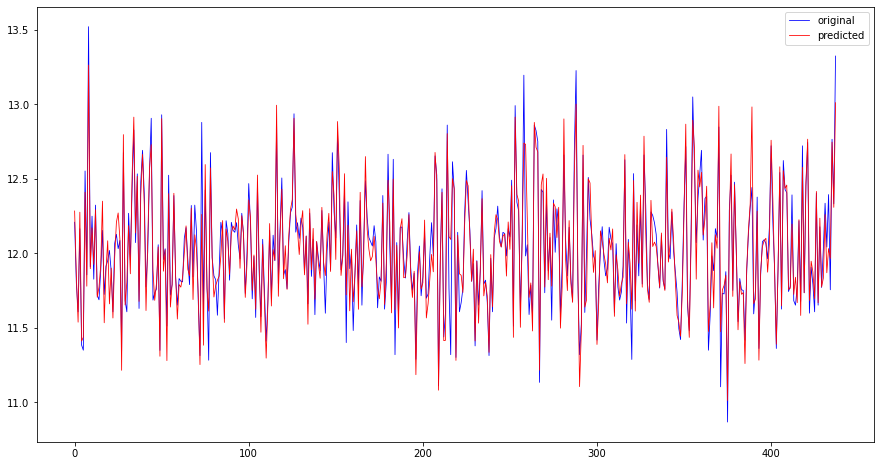

In [239]:
plt.subplots(figsize=(15, 8))
x_ax = range(len(y_valid))
plt.plot(x_ax, y_valid, lw=0.8, color="blue", label="original")
plt.plot(x_ax, clf_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [240]:
param_grid={'n_estimators':[100],    #,500,1000], 
            'learning_rate': [0.1,0.05,0.02],   # 0.01],
            'max_depth':[4,6], 
            'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0,0.3,0.1] } 

In [241]:
from sklearn.ensemble import GradientBoostingRegressor 

## Random Forest Regressor

A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [242]:
from sklearn.ensemble import RandomForestRegressor

In [243]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit( X_training, y_training)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [244]:
clf_pred=grid_search.predict(X_valid)
clf_pred= clf_pred.reshape(-1,1)
r2_clf = r2_score(y_valid, clf_pred)
rmse_clf = np.sqrt(mean_squared_error(y_valid, clf_pred))
print("R^2 Score: " + str(r2_clf))
print("RMSE Score: " + str(rmse_clf))

R^2 Score: 0.8578804622536399
RMSE Score: 0.14818586662238048


In [245]:
scores_clf = cross_val_score(grid_search, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_clf)))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Cross Validation Score: 0.8194355058215784


## XGBoost for Regression

The results of the regression problems are continuous or real values. Some commonly used regression algorithms are Linear Regression and Decision Trees. There are several metrics involved in regression like root-mean-squared error (RMSE) and mean-squared-error (MAE). These are some key members for XGBoost models, each plays their important roles.

RMSE: It is the square root of mean squared error (MSE).
MAE: It is an absolute sum of actual and predicted differences, but it lacks mathematically, that’s why it is rarely used, as compared to other metrics.
XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners.

The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics.

Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

In [246]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(learning_rate=0.01,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
xgb = xgboost.fit(X_training, y_training)

[21:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [247]:
xgb_pred = xgb.predict(X_valid)
r2_xgb = r2_score(y_valid, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, xgb_pred))
print("R^2 Score: " + str(r2_xgb))
print("RMSE Score: " + str(rmse_xgb))

R^2 Score: 0.9037664557148847
RMSE Score: 0.121939141138396


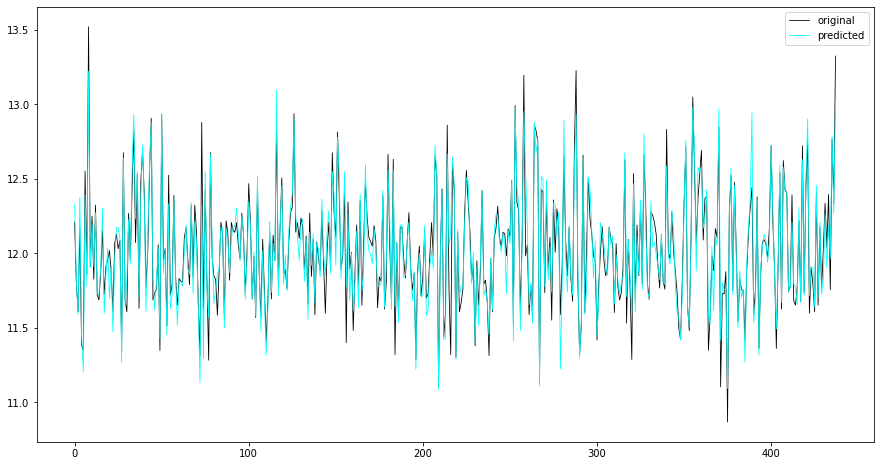

In [253]:
plt.subplots(figsize=(15, 8))
x_ax = range(len(y_valid))
plt.plot(x_ax, y_valid, lw=0.8, color="black", label="original")
plt.plot(x_ax, xgb_pred, lw=0.8, color="cyan", label="predicted")
plt.legend()
plt.show()

This graph represents orginal values and predicted values comparision this model predicted with good accuracy.

## Test data

In [254]:
test.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,140,0,0,0,120,6,2010,WD,Normal
1,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,TA,393,36,0,0,0,6,2010,WD,Normal
2,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,212,34,0,0,0,3,2010,WD,Normal
3,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,TA,360,36,0,0,0,6,2010,WD,Normal
4,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,TA,0,82,0,0,144,1,2010,WD,Normal


In [255]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 51 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1459 non

In [256]:
test['MSZoning'].value_counts().to_dict()

{'RL': 1118, 'RM': 242, 'FV': 74, 'C (all)': 15, 'RH': 10}

In [257]:
mszoning={'RL': 1, 'RM': 2, 'FV': 3, 'RH': 4, 'C (all)': 5}

In [258]:
test['MSZoning']=test['MSZoning'].map(mszoning)

In [259]:
test['MSZoning'].tail(5)

1454    2
1455    2
1456    1
1457    1
1458    1
Name: MSZoning, dtype: int64

In [260]:
test['MSZoning'].unique()

array([4, 1, 2, 3, 5], dtype=int64)

In [261]:
test['Street'].value_counts().to_dict()

{'Pave': 1453, 'Grvl': 6}

In [262]:
street={'Pave': 1, 'Grvl': 0}

In [263]:
test['Street']=test['Street'].map(street)

In [264]:
test['LotShape'].value_counts().to_dict()

{'Reg': 934, 'IR1': 484, 'IR2': 35, 'IR3': 6}

In [265]:
lotshape={'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}

In [266]:
test['LotShape']=test['LotShape'].map(lotshape)

In [267]:
test['LotShape'].unique()

array([1, 2, 3, 4], dtype=int64)

In [268]:
test['LandContour'].value_counts().to_dict()

{'Lvl': 1311, 'HLS': 70, 'Bnk': 54, 'Low': 24}

In [269]:
land={'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4}

In [270]:
test['LandContour']=test['LandContour'].map(land)

In [271]:
test['Utilities'].value_counts().to_dict()

{'AllPub': 1459}

In [272]:
uti={'AllPub': 1, 'NoSeWa': 0}

In [273]:
test['Utilities']=test['Utilities'].map(uti)

In [274]:
test['Utilities'].unique()

array([1], dtype=int64)

In [275]:
test['LotConfig'].value_counts().to_dict()

{'Inside': 1081, 'Corner': 248, 'CulDSac': 82, 'FR2': 38, 'FR3': 10}

In [276]:
lotcon={'Inside': 0, 'Corner': 1, 'CulDSac': 2, 'FR2': 3, 'FR3': 4}

In [277]:
test['LotConfig']=test['LotConfig'].map(lotcon)

In [278]:
test['LotConfig'].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [279]:
test['LandSlope'].value_counts().to_dict()

{'Gtl': 1396, 'Mod': 60, 'Sev': 3}

In [280]:
land={'Gtl': 0, 'Mod': 1, 'Sev': 2}

In [281]:
test['LandSlope']=test['LandSlope'].map(land)

In [282]:
test['LandSlope'].unique()

array([0, 1, 2], dtype=int64)

In [283]:
test['Neighborhood'].value_counts().to_dict()

{'NAmes': 218,
 'OldTown': 126,
 'CollgCr': 117,
 'Somerst': 96,
 'Edwards': 94,
 'NridgHt': 89,
 'Gilbert': 86,
 'Sawyer': 77,
 'SawyerW': 66,
 'Mitchel': 65,
 'NWAmes': 58,
 'IDOTRR': 56,
 'Crawfor': 52,
 'BrkSide': 50,
 'Timber': 34,
 'NoRidge': 30,
 'StoneBr': 26,
 'SWISU': 23,
 'MeadowV': 20,
 'ClearCr': 16,
 'NPkVill': 14,
 'BrDale': 14,
 'Veenker': 13,
 'Blmngtn': 11,
 'Blueste': 8}

In [284]:
neigh={'NAmes': 0,
 'CollgCr': 1,
 'OldTown': 2,
 'Edwards': 3,
 'Somerst': 4,
 'Gilbert': 5,
 'NridgHt': 6,
 'Sawyer': 7,
 'NWAmes': 8,
 'SawyerW': 9,
 'BrkSide': 10,
 'Crawfor': 11,
 'Mitchel': 12,
 'NoRidge': 13,
 'Timber': 14,
 'IDOTRR': 15,
 'ClearCr': 16,
 'StoneBr': 17,
 'SWISU': 18,
 'MeadowV': 19,
 'Blmngtn': 20,
 'BrDale': 21,
 'Veenker': 22,
 'NPkVill': 23,
 'Blueste': 24}

In [285]:
test['Neighborhood']=test['Neighborhood'].map(neigh)

In [286]:
test['Neighborhood'].unique()

array([ 0,  5, 17, 21, 23,  6, 20, 13,  4,  9,  7,  8,  2, 10, 16, 18,  3,
        1, 11, 24, 15, 12, 14, 19, 22], dtype=int64)

In [287]:
test['Condition1'].value_counts().to_dict()

{'Norm': 1251,
 'Feedr': 83,
 'Artery': 44,
 'RRAn': 24,
 'PosN': 20,
 'RRAe': 17,
 'PosA': 12,
 'RRNe': 4,
 'RRNn': 4}

In [288]:
condit={'Norm': 0,
 'Feedr': 1,
 'Artery': 2,
 'RRAn': 3,
 'PosN': 4,
 'RRAe': 5,
 'PosA': 6,
 'RRNn': 7,
 'RRNe': 8}

In [289]:
test['Condition1']=test['Condition1'].map(condit)

In [290]:
test['Condition1'].unique()

array([1, 0, 4, 8, 2, 7, 6, 3, 5], dtype=int64)

In [291]:
test['BldgType'].value_counts().to_dict()

{'1Fam': 1205, 'TwnhsE': 113, 'Duplex': 57, 'Twnhs': 53, '2fmCon': 31}

In [292]:
buld={'1Fam': 0, 'TwnhsE': 1, 'Duplex': 2, 'Twnhs': 3, '2fmCon': 4}

In [293]:
test['BldgType']=test['BldgType'].map(buld)

In [294]:
test['BldgType'].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [295]:
test['HouseStyle'].value_counts().to_dict()

{'1Story': 745,
 '2Story': 427,
 '1.5Fin': 160,
 'SLvl': 63,
 'SFoyer': 46,
 '2.5Unf': 13,
 '1.5Unf': 5}

In [296]:
house={'1Story': 0,
 '2Story': 1,
 '1.5Fin': 2,
 'SLvl': 3,
 'SFoyer': 4,
 '1.5Unf': 5,
 '2.5Unf': 6,
 '2.5Fin': 7}

In [297]:
test['HouseStyle']=test['HouseStyle'].map(house)

In [298]:
test['HouseStyle'].unique()

array([0, 1, 3, 2, 4, 6, 5], dtype=int64)

In [299]:
test['RoofStyle'].value_counts().to_dict()

{'Gable': 1169, 'Hip': 265, 'Gambrel': 11, 'Flat': 7, 'Mansard': 4, 'Shed': 3}

In [300]:
roof={'Gable': 0, 'Hip': 1, 'Flat': 2, 'Gambrel': 3, 'Mansard': 4, 'Shed': 5}

In [301]:
test['RoofStyle']=test['RoofStyle'].map(roof)

In [302]:
test['RoofStyle'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [303]:
test['RoofMatl'].value_counts().to_dict()

{'CompShg': 1442, 'Tar&Grv': 12, 'WdShake': 4, 'WdShngl': 1}

In [304]:
roofmt={'CompShg': 0,
 'Tar&Grv': 1,
 'WdShngl': 2,
 'WdShake': 3,
 'ClyTile': 4,
 'Membran': 5,
 'Roll': 6,
 'Metal': 7}

In [305]:
test['RoofMatl']=test['RoofMatl'].map(roofmt)

In [306]:
test['RoofMatl'].unique()

array([0, 1, 3, 2], dtype=int64)

In [307]:
test['Exterior1st'].value_counts().to_dict()

{'VinylSd': 511,
 'MetalSd': 230,
 'HdBoard': 220,
 'Wd Sdng': 205,
 'Plywood': 113,
 'CemntBd': 65,
 'BrkFace': 37,
 'WdShing': 30,
 'AsbShng': 24,
 'Stucco': 18,
 'BrkComm': 4,
 'CBlock': 1,
 'AsphShn': 1}

In [308]:
exterior={'VinylSd': 0,
 'HdBoard': 1,
 'MetalSd': 2,
 'Wd Sdng': 3,
 'Plywood': 4,
 'CemntBd': 5,
 'BrkFace': 6,
 'WdShing': 7,
 'Stucco': 8,
 'AsbShng': 9,
 'Stone': 10,
 'BrkComm': 11,
 'AsphShn': 12,
 'ImStucc': 13,
 'CBlock': 14}

In [309]:
test['Exterior1st']=test['Exterior1st'].map(exterior)

In [310]:
test['Exterior1st'].unique()

array([ 0,  3,  1,  4,  2,  5,  7,  6,  9, 11,  8, 12, 14], dtype=int64)

In [311]:
test['ExterQual'].value_counts().to_dict()

{'TA': 892, 'Gd': 491, 'Ex': 55, 'Fa': 21}

In [312]:
ExterQual={'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3}

In [313]:
test['ExterQual']=test['ExterQual'].map(ExterQual)

In [314]:
test['ExterQual'].unique()

array([0, 1, 2, 3], dtype=int64)

In [315]:
test['ExterCond'].value_counts().to_dict()

{'TA': 1256, 'Gd': 153, 'Fa': 39, 'Ex': 9, 'Po': 2}

In [316]:
ExterCond={'TA': 0, 'Gd': 1, 'Fa': 2, 'Ex': 3, 'Po': 4}

In [317]:
test['ExterCond']=test['ExterCond'].map(ExterCond)

In [318]:
test['ExterCond'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [319]:
test['Foundation'].value_counts().to_dict()

{'PConc': 661, 'CBlock': 601, 'BrkTil': 165, 'Slab': 25, 'Stone': 5, 'Wood': 2}

In [320]:
Foundation={'PConc': 0, 'CBlock': 1, 'BrkTil': 2, 'Slab': 3, 'Stone': 4, 'Wood': 5}

In [321]:
test['Foundation']=test['Foundation'].map(Foundation)

In [322]:
test['Foundation'].unique()

array([1, 0, 2, 4, 3, 5], dtype=int64)

In [323]:
test['BsmtQual'].value_counts().to_dict()

{'TA': 678, 'Gd': 591, 'Ex': 137, 'Fa': 53}

In [324]:
BsmtQual={'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3}

In [325]:
test['BsmtQual']=test['BsmtQual'].map(BsmtQual)

In [326]:
test['BsmtQual'].unique()

array([0, 1, 2, 3], dtype=int64)

In [327]:
test['BsmtCond'].value_counts().to_dict()

{'TA': 1340, 'Fa': 59, 'Gd': 57, 'Po': 3}

In [328]:
BsmtCond={'TA': 0, 'Gd': 1, 'Fa': 2, 'Po': 3}

In [329]:
test['BsmtCond']=test['BsmtCond'].map(BsmtCond)

In [330]:
test['BsmtCond'].unique()

array([0, 3, 2, 1], dtype=int64)

In [331]:
test['BsmtExposure'].value_counts().to_dict()

{'No': 995, 'Av': 197, 'Gd': 142, 'Mn': 125}

In [332]:
BsmtExposure={'No': 0, 'Av': 1, 'Gd': 2, 'Mn': 3}

In [333]:
test['BsmtExposure']=test['BsmtExposure'].map(BsmtExposure)

In [334]:
test['BsmtExposure'].unique()

array([0, 2, 3, 1], dtype=int64)

In [335]:
test['CentralAir'].value_counts().to_dict()

{'Y': 1358, 'N': 101}

In [336]:
CentralAir={'Y': 1, 'N': 0}

In [337]:
test['CentralAir']=test['CentralAir'].map(CentralAir)

In [338]:
test['CentralAir'].unique()

array([1, 0], dtype=int64)

In [339]:
test['Electrical'].value_counts().to_dict()

{'SBrkr': 1337, 'FuseA': 94, 'FuseF': 23, 'FuseP': 5}

In [340]:
Electrical={'SBrkr': 0, 'FuseA': 1, 'FuseF': 2, 'FuseP': 3, 'Mix': 4}

In [341]:
test['Electrical']=test['Electrical'].map(Electrical)

In [342]:
test['Electrical'].unique()

array([0, 1, 2, 3], dtype=int64)

In [343]:
test['KitchenQual'].value_counts().to_dict()

{'TA': 758, 'Gd': 565, 'Ex': 105, 'Fa': 31}

In [344]:
KitchenQual={'TA': 0, 'Gd': 1, 'Ex': 2, 'Fa': 3}

In [345]:
test['KitchenQual']=test['KitchenQual'].map(KitchenQual)

In [346]:
test['KitchenQual'].unique()

array([0, 1, 2, 3], dtype=int64)

In [347]:
test['Functional'].value_counts().to_dict()

{'Typ': 1359,
 'Min2': 36,
 'Min1': 34,
 'Mod': 20,
 'Maj1': 5,
 'Maj2': 4,
 'Sev': 1}

In [348]:
Functional={'Typ': 0,
 'Min2': 1,
 'Min1': 2,
 'Mod': 3,
 'Maj1': 4,
 'Maj2': 5,
 'Sev': 6}

In [349]:
test['Functional']=test['Functional'].map(Functional)

In [350]:
test['Functional'].unique()

array([0, 1, 2, 3, 4, 6, 5], dtype=int64)

In [351]:
test['GarageType'].value_counts().to_dict()

{'Attchd': 929,
 'Detchd': 392,
 'BuiltIn': 98,
 '2Types': 17,
 'Basment': 17,
 'CarPort': 6}

In [352]:
GarageType={'Attchd': 0,
 'Detchd': 1,
 'BuiltIn': 2,
 'Basment': 3,
 'CarPort': 4,
 '2Types': 5}

In [353]:
test['GarageType']=test['GarageType'].map(GarageType)

In [354]:
test['GarageType'].unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [355]:
test['GarageFinish'].value_counts().to_dict()

{'Unf': 703, 'RFn': 389, 'Fin': 367}

In [356]:
GarageFinish={'Unf': 0, 'RFn': 1, 'Fin': 2}

In [357]:
test['GarageFinish']=test['GarageFinish'].map(GarageFinish)

In [358]:
test['GarageFinish'].unique()

array([0, 2, 1], dtype=int64)

In [359]:
test['GarageQual'].value_counts().to_dict()

{'TA': 1371, 'Fa': 76, 'Gd': 10, 'Po': 2}

In [360]:
GarageQual={'TA': 0, 'Fa': 1, 'Gd': 2, 'Ex': 3, 'Po': 4}

In [361]:
test['GarageQual']=test['GarageQual'].map(GarageQual)

In [362]:
test['GarageQual'].unique()

array([0, 1, 2, 4], dtype=int64)

In [363]:
test['GarageCond'].value_counts().to_dict()

{'TA': 1406, 'Fa': 39, 'Po': 7, 'Gd': 6, 'Ex': 1}

In [364]:
GarageCond={'TA': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'Ex': 4}

In [365]:
test['GarageCond']=test['GarageCond'].map(GarageCond)

In [366]:
test['GarageCond'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [367]:
test['SaleType'].value_counts().to_dict()

{'WD': 1259,
 'New': 117,
 'COD': 44,
 'ConLD': 17,
 'CWD': 8,
 'Oth': 4,
 'ConLI': 4,
 'Con': 3,
 'ConLw': 3}

In [368]:
SaleType={'WD': 0,
 'New': 1,
 'COD': 2,
 'ConLD': 3,
 'ConLI': 4,
 'ConLw': 5,
 'CWD': 6,
 'Oth': 7,
 'Con': 8}

In [369]:
test['SaleType']=test['SaleType'].map(SaleType)

In [370]:
test['SaleType'].unique()

array([0, 2, 1, 3, 7, 8, 5, 4, 6], dtype=int64)

In [371]:
test['SaleCondition'].value_counts().to_dict()

{'Normal': 1204,
 'Partial': 120,
 'Abnorml': 89,
 'Family': 26,
 'Alloca': 12,
 'AdjLand': 8}

In [372]:
SaleCondition = {'Normal': 0,
 'Partial': 1,
 'Abnorml': 2,
 'Family': 3,
 'Alloca': 4,
 'AdjLand': 5}

In [373]:
test['SaleCondition']=test['SaleCondition'].map(SaleCondition)

In [374]:
test['SaleCondition'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [375]:
xgb=xgb.predict(test)

In [380]:
xgb=np.exp(xgb)

In [384]:
xgb[0]

122600.37

In [383]:
data['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [385]:
res=pd.DataFrame(columns = ['Id', 'SalePrice'])
res['Id'] = test.index + 1461
res['SalePrice'] = xgb
res.to_csv('house_price.csv',index=False)

## Conclusion

**Linear Regression** accuracy is 0.8077016963675668

**Ridge regression** accuracy is 0.8078452911819941

**Gradient Boosting** Regression accuracy is 0.8919513277864803

**Random Forest Regressor** accuracy is 0.8578804622536399

**XGBoost** accuracy is 0.9037664557148847

We compared this five algorithms for this problem and xgboost perform very well better than others.